<a href="https://colab.research.google.com/github/joseluisfalla/DSPS_JFalla/blob/main/HW7/clusteringGenes_DSPS2023_JFalla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn
!pip install umap-learn[plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 701.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=3f73b0f070e3bcbff3a65e4efeaaa49a9eb8308859fd242f632b68331e9b9c74
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=00a56c7869347650c0b152fc6c4998d38a41dfe5004692eca82e20b8bfa75229
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 62.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import pylab as plt
import scipy as sp
import sklearn as skl
from sklearn import cluster
import umap
import umap.plot
from scipy.cluster.hierarchy import dendrogram, linkage

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# I  read the data
in https://github.com/fedhere/DSPS_FBianco/tree/master/HW7
its called kidpackgene.csv

In [3]:
genes = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW7/kidpackgenes.csv')

In [4]:
genes.head()

Unnamed: 0         1         2         3         4         5         6  \
0           1 -0.146342 -0.520637  0.175828 -0.323736  0.172691  0.025156   
1           2 -0.465767  0.155823  0.226344 -0.547542  0.041096  0.137012   
2           3 -0.088964 -0.208241 -0.151039 -0.288229 -0.425568  0.121006   
3           4 -0.327696 -1.714948  0.068710 -0.168257 -0.471577  0.279013   
4           5 -0.092327 -0.660456  0.075948 -0.646501 -0.046137 -0.010305   

          7         8        10  ...        76        77        78        79  \
0  0.024812  0.172268  0.207188  ...  0.240705 -0.347746 -0.001797 -0.260594   
1  0.102497 -0.034277  0.500871  ...  0.371435 -0.447105 -0.134904 -0.250699   
2 -0.097883 -0.007597  0.329636  ... -0.014990 -0.458297 -0.050852 -0.168500   
3 -0.060734 -0.222574  0.658097  ...  0.153765 -0.140409 -0.119515 -0.289881   
4  0.368476 -0.043832 -0.321060  ... -0.033032  0.394082  0.173515 -0.194819   

         81        83        84        85        86        87  
0  0.105968  0.110885 -0.006975  0.550118  0.118934  0.327248  
1  0.164698 -0.035022  0.250384  0.463746 -0.514230  0.200956  
2  0.078716 -0.032231 -0.116947 -0.199880 -0.415793 -0.032004  
3  0.944493 -0.142710 -1.119866 -0.215536  0.345946  0.056442  
4  0.149131 -0.097285 -0.288192 -0.491920 -0.722120  0.055477  

[5 rows x 75 columns]

In [5]:
genes.tail()

Unnamed: 0         1         2         3         4         5         6  \
4219        4220 -0.314408  0.131512 -0.049018 -0.674385 -0.289890  0.258422   
4220        4221 -0.313823 -0.041095 -0.049798 -0.492502 -0.223146  0.172682   
4221        4222 -0.091283  0.118607 -0.088939 -0.349571 -0.107676  0.019609   
4222        4223 -0.552395  0.125635 -0.290230 -1.283253 -0.870161 -0.131500   
4223        4224 -0.907778 -0.052512 -0.216276 -1.484158 -0.719684 -0.386958   

             7         8        10  ...        76        77        78  \
4219 -0.120400 -0.060359  0.706799  ...  0.379001  0.009101 -0.182293   
4220 -0.164426  0.033539  0.420965  ...  0.086748  0.198886 -0.167620   
4221  0.187555  0.214635  0.210662  ... -0.121660  0.004138 -0.170726   
4222  0.100046  0.153907  0.582813  ...  0.219980 -0.503742 -0.727327   
4223 -0.123006 -0.313543  0.271196  ... -0.601880 -0.472821 -0.446067   

            79        81        83        84        85        86        87  
4219 -0.270911 -0.434925 -0.031925  1.402160  0.502573 -0.061042 -0.206210  
4220 -0.336774  0.022460 -0.211773  0.379261  0.465487  0.024584 -0.264364  
4221 -0.129437 -0.379607  0.007242  0.258818  0.284263 -0.008146 -0.047151  
4222 -0.477732 -0.523019 -0.382573  0.830773  0.246017 -0.002329  0.100187  
4223 -0.528082 -0.126050 -0.546075  0.043611 -0.179660 -0.712337 -0.193261  

[5 rows x 75 columns]

make sure you are not reading the index as a feature! you can control this with the index_col paramter of the function pd.read_csv or remove the column after you read the data in


make sure you show the data and look at it carefully

In [6]:
genes.shape

(4224, 75)

# II  Explore and preprocess the data  explore the data.


## II a
missing values? (remember you can use the missingno package and visualize the missing values!). What should you do with them?

<Axes: >

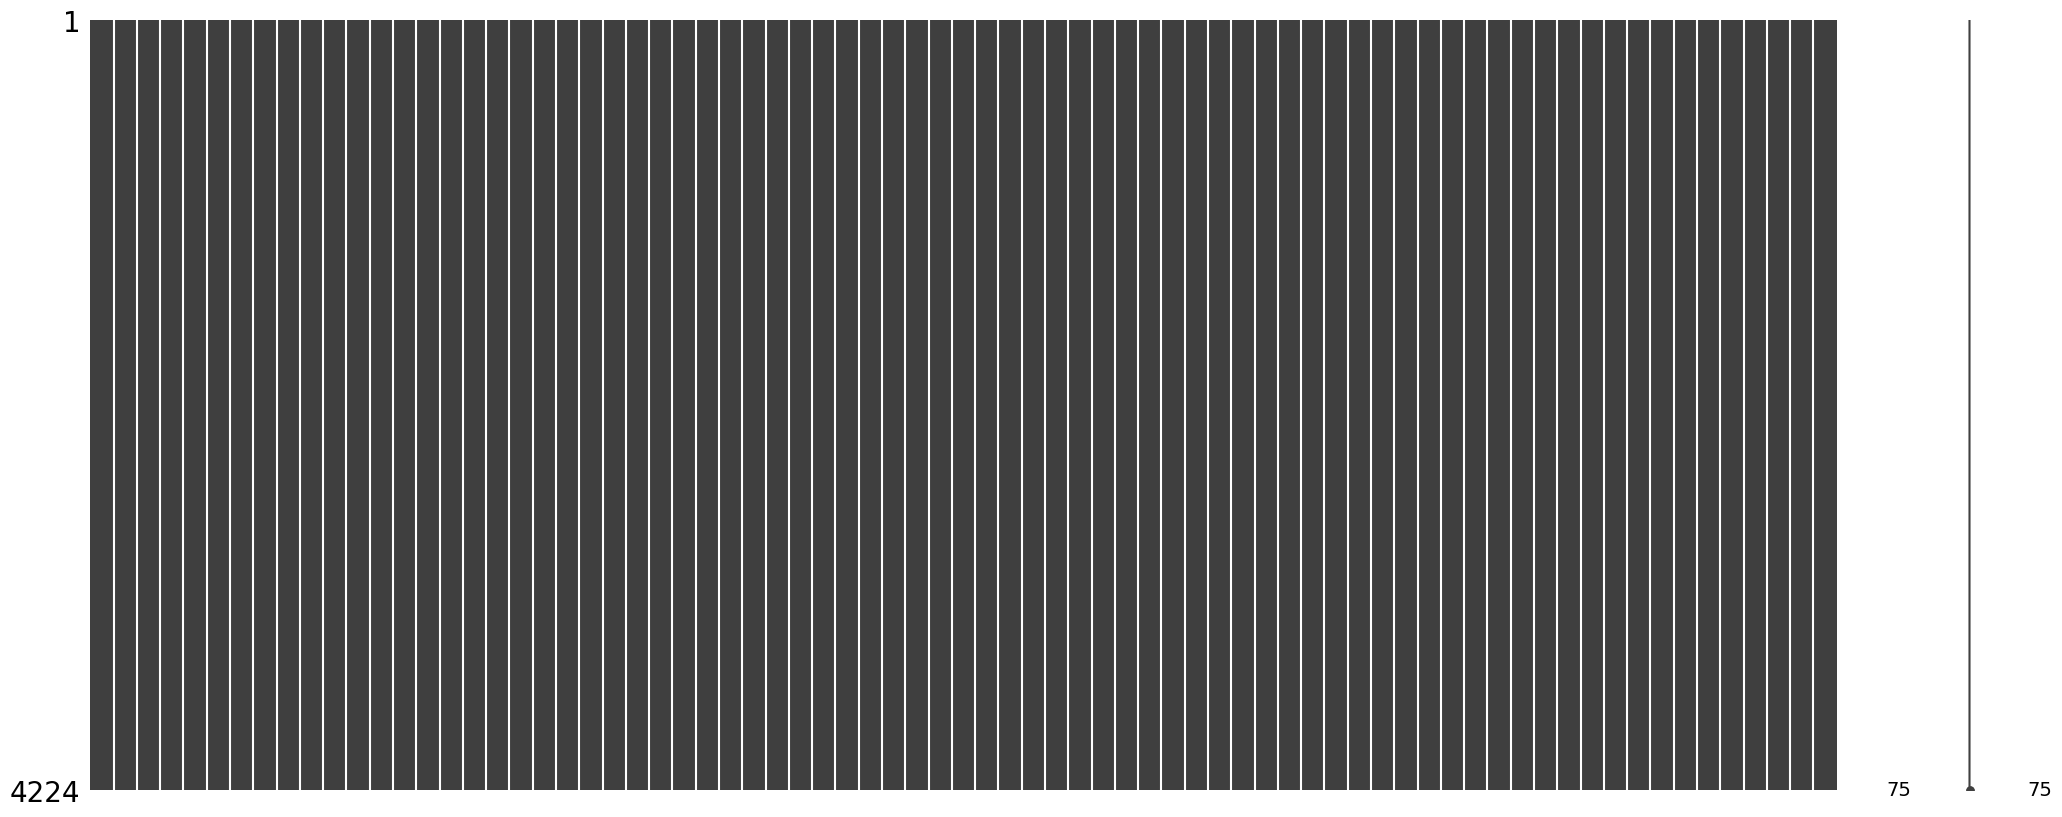

In [7]:
import missingno as msno
msno.matrix(genes)

No Nan values.

## II b
whiten it, normalize it, scale it. What is appropriate? discuss your choices

In [8]:
#delete
scaledgenes = skl.preprocessing.scale(genes, axis=0)

In [9]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([-0.,  0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,
         0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,
         0., -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,
        -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,
         0.,  0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
         0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.]))

# III Visualize the data


## III-a calculate and plot a t-SNE rojection of the data on an optimal 2D plane

The hyperparameteres perplexity and possibly early_exaggeration may significantly impact the result. Find values that give you some structure in the data. Make sure you read the docstring and info on tSNE!

In [10]:
twodproj = skl.manifold.TSNE(n_components=2, init='random').fit_transform(scaledgenes)

In [11]:
twodproj.shape

(4224, 2)

plot the TSNE 2D projection


Text(0.5, 1.0, '2D Projection of Gene Dataset')

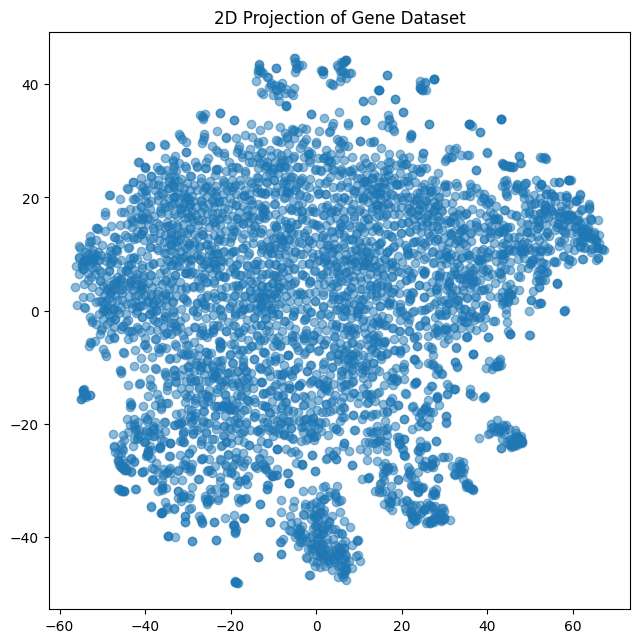

In [12]:
fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_subplot()
ax.plot(twodproj[:,0], twodproj[:,1], 'o', alpha = 0.5)
ax.set_title('2D Projection of Gene Dataset')

Figure 1. TSNE 2D projection of gene dataset using random initializer.

## III-b calculate and plot the UMAP 2D projection

/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


Text(0.5, 1.0, 'UMAP 2D Projection of Gene Dataset')

<Figure size 600x600 with 0 Axes>

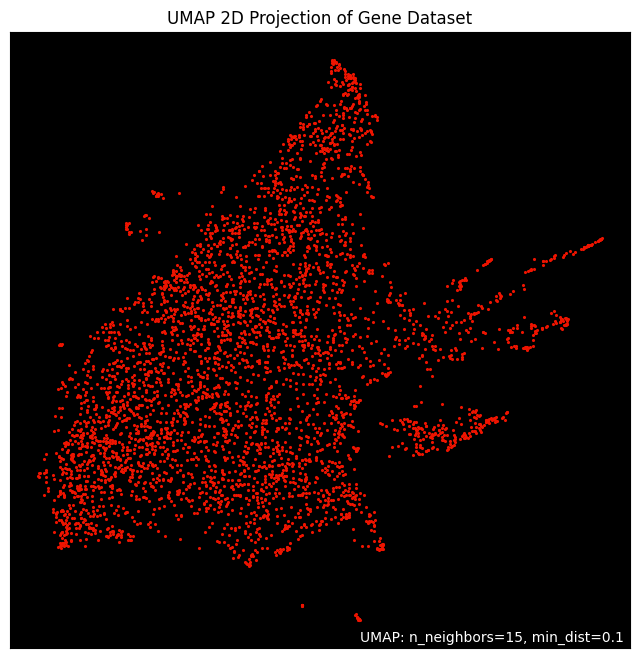

In [13]:
mapper = umap.UMAP(n_components=2).fit(scaledgenes)
fig = plt.figure(figsize=(6, 6))
ax = umap.plot.points(mapper, theme='fire')
ax.set_title('UMAP 2D Projection of Gene Dataset')

Figure 2. UMAP 2D projection of gene dataset.

# IV K-MEANS Clustering

## IV-a find the best number of culsters for this dataset

create a function that measures the intracluster variance

the intracluster variance is the sum of the variance of each cluster
$V =\sum_J \sum_i{(X_{i\in j} - \bar{X_j})^2}$ for $i$ points in $j$ clusters

In [14]:
def calICVar(X, labels):
    """calculates the intracluster variance of the k-MEANS algorithm
    X: the input data (ndarray)
    labels: the labels indicating the cluster of each datapoint: same number of data as X
    """

    icvar = 0

    for l in np.unique(labels):
      icvar += np.sum((X[labels == l] - X[labels == l].mean())**2)

    return icvar

cluster the data with K-Means using 1 to 10 clusters. Calculate the intracluster variance and look for an "elbow" in the value of the intracluster variance as a function of number of clusters/ What is the optimal number of clusters?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

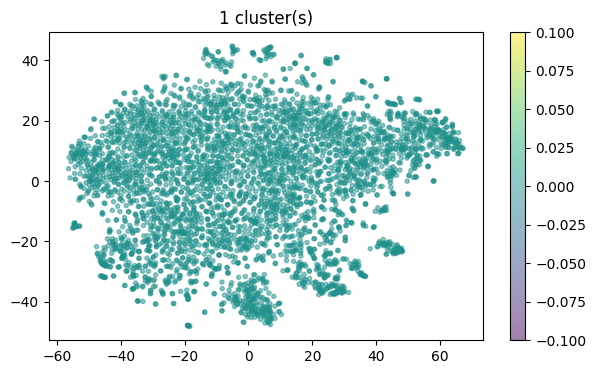

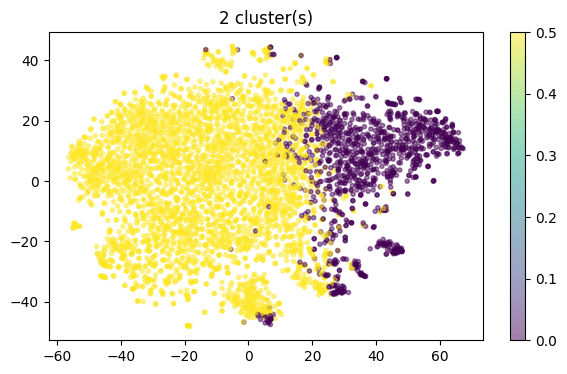

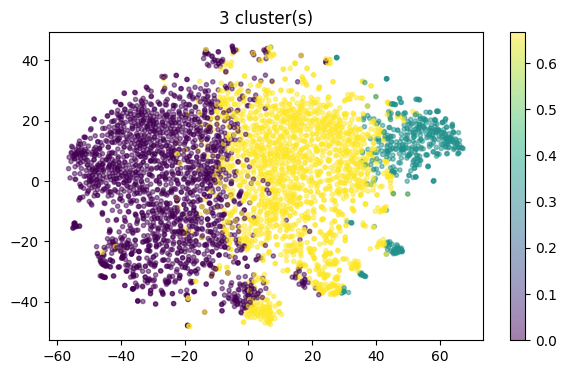

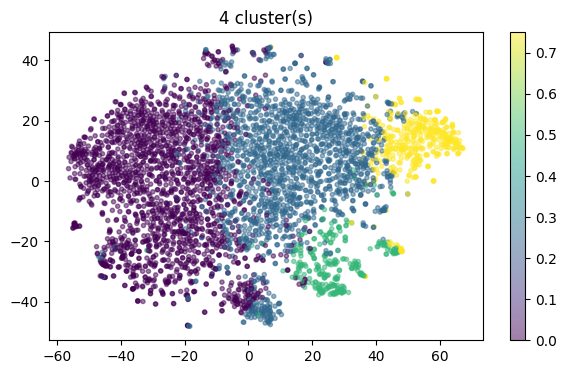

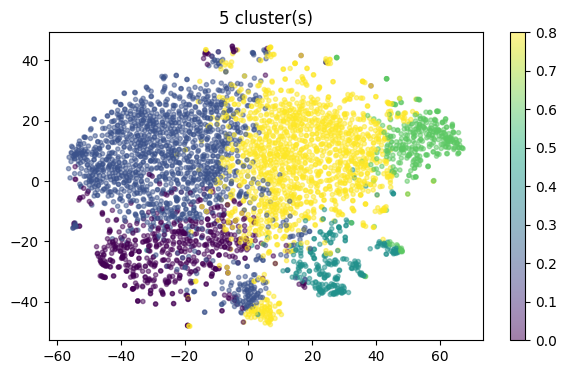

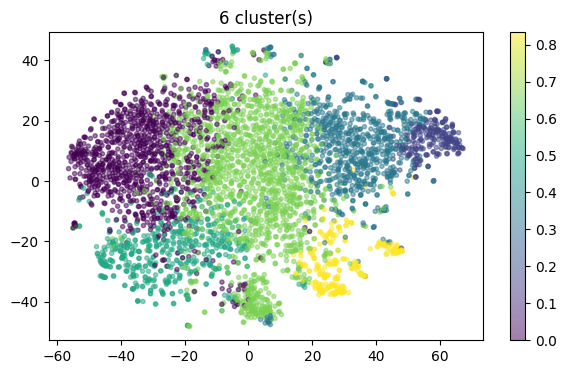

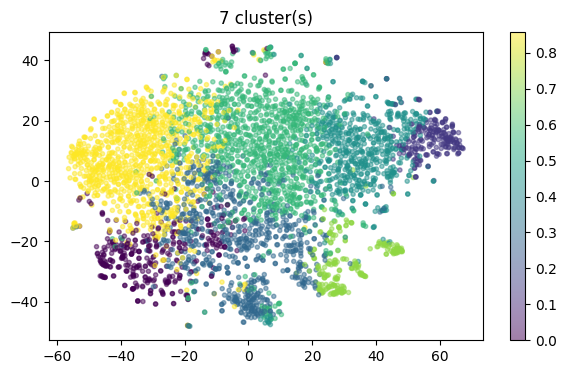

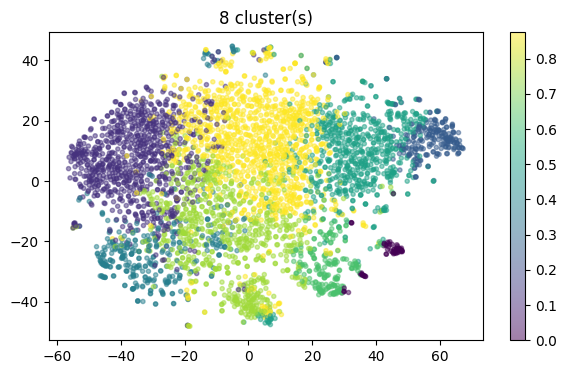

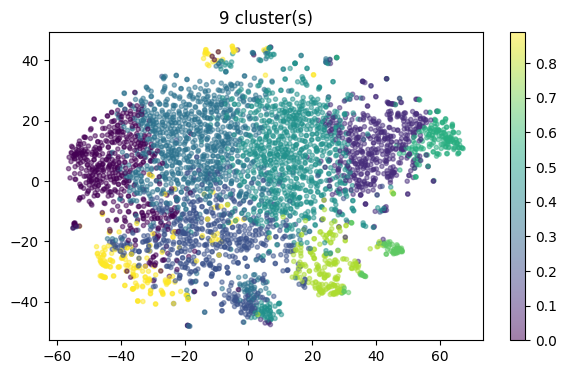

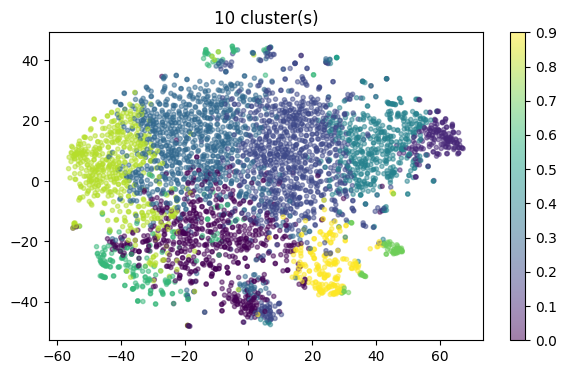

In [15]:
vars = [] #list of intracluster variance values for KMeans being run with 1->10 clusters
for i in range(10):
  gene_clusters_KM = cluster.KMeans(n_clusters=(i + 1)).fit(scaledgenes)
  vars.append(calICVar(scaledgenes, gene_clusters_KM.labels_))
  plt.figure(figsize=(7, 4))
  plt.scatter(twodproj[:,0], twodproj[:,1], c=(gene_clusters_KM.labels_ / gene_clusters_KM.n_clusters), marker='.', alpha = 0.5)
  plt.title('{} cluster(s)'.format(i + 1))
  plt.colorbar()
plt.show()

Text(0, 0.5, 'Intracluster Variance')

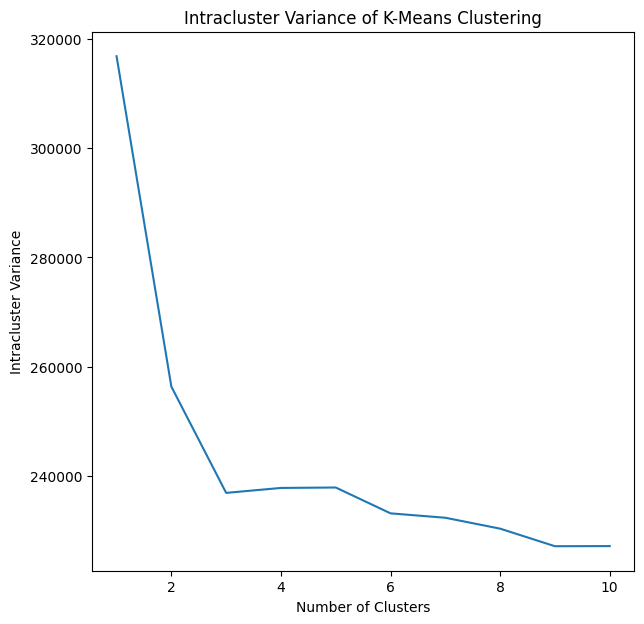

In [16]:
# elbow plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
x = range(1, 11, 1)
ax.plot(x, vars)
ax.set_title('Intracluster Variance of K-Means Clustering')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Intracluster Variance')

Figure 3. Elbow plot for K-Means intracluster variance to determine the optimal number of clusters. The figure shows a sharp decrease from 1 to 3 clusters; plateauing off at 3 clusters. The intracluster variance does decrease a bit more after 5 clusters, yet the elbow is mostly pronounced at 3 clusters. Based on this plot, it seems like the best number of clusters to use is 3.

Based on the elbow plot above (see also slides) what is the right number of clusters for this dataset? DISCUSS!

## IV-b Cluster the data with k-Means into the number of clusters as determined from the elbow

In [17]:
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## IV-c plot and plot the t-SNY and UMAP projections of the data using the cluster number as color

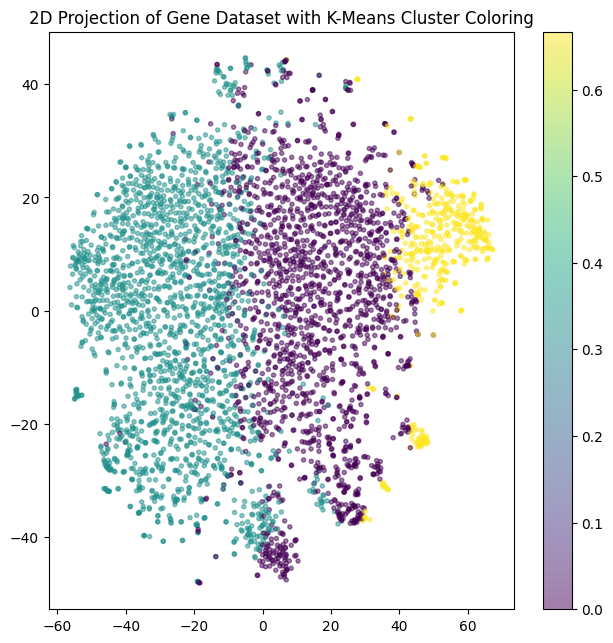

In [18]:
plt.figure(figsize=(7.5, 7.5))
plt.scatter(twodproj[:,0], twodproj[:,1], c=(geneclustersKM.labels_ / geneclustersKM.n_clusters), marker='.', alpha = 0.5)
plt.title('2D Projection of Gene Dataset with K-Means Cluster Coloring')
plt.colorbar()

Figure 4. TSNE 2D projection of gene dataset using K-Means (with number of clusters = 3) to color the clusters.

Text(0.5, 1.0, 'UMAP 2D Projection of Gene Dataset using KM Cluster Colors')

<Figure size 600x600 with 0 Axes>

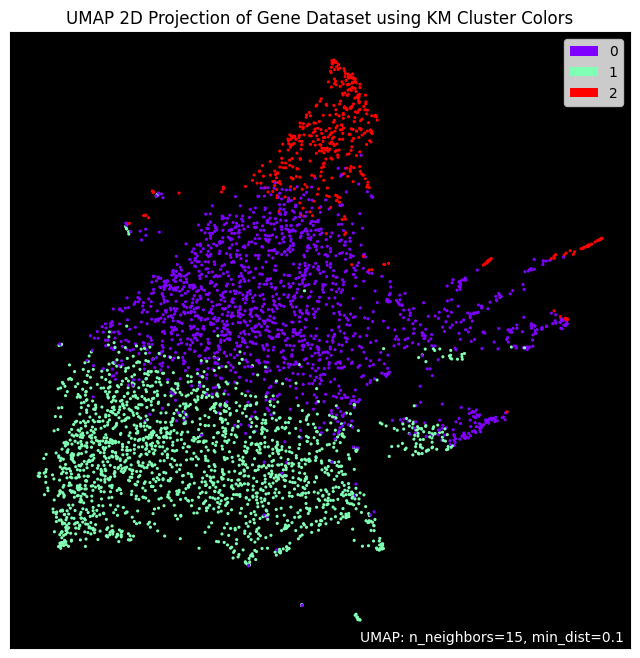

In [19]:
fig = plt.figure(figsize=(6, 6))
ax = umap.plot.points(mapper, labels=geneclustersKM.labels_, theme='fire')
ax.set_title('UMAP 2D Projection of Gene Dataset using KM Cluster Colors')

Figure 5. UMAP 2D projection of gene dataset using K-Means (with number of clusters = 3) to color the clusters.

# Use dDSCAN or hierarchical clustering (461 pick either DBSCAN or hierarchical) and redo the clustering. Can you find the same number of clusters?

# V DBSCAN Clustering


## V-a measure the distribution of Euclidean distances

It is important to choose the hyperparamters of DBSCAN wisely. Initialize the _eps_ parameter of DBSCAN based on the mean Euclidean distance. To that end, calculate and plot the Euclidean distance matrix of each point pairs if you have not yet

In [20]:
dists = sp.spatial.distance.pdist(scaledgenes)

 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is below the mean

Text(0.5, 1.0, 'Histogram of Pairwise Distances')

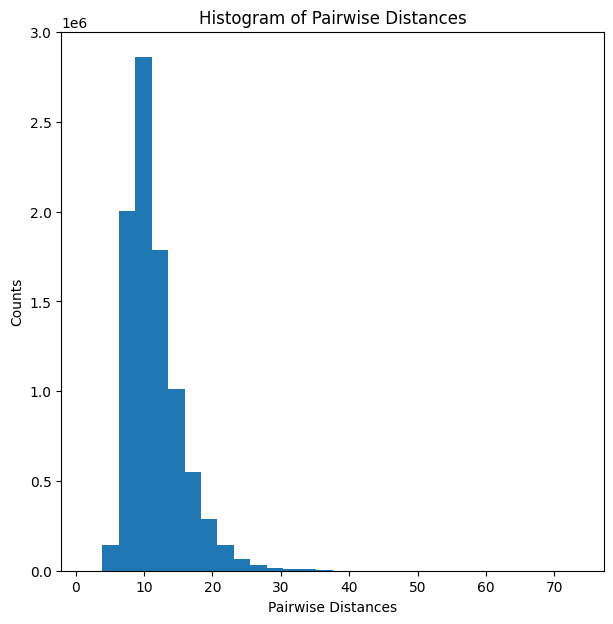

In [21]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
ax.hist(dists, bins=30)
ax.set_xlabel('Pairwise Distances')
ax.set_ylabel('Counts')
ax.set_title('Histogram of Pairwise Distances')

Fig 6. Histogram of pairwise distances in gene dataset. Based on this histogram, it seems like 7 is a good number to initialize DBScan, as it falls under the mean.

To double check for the optimal eps value for DBScan, I'm going to implement the idea proposed [here](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/). This is the nearest neighbor method used to determine the optimum value for DBScan's eps.

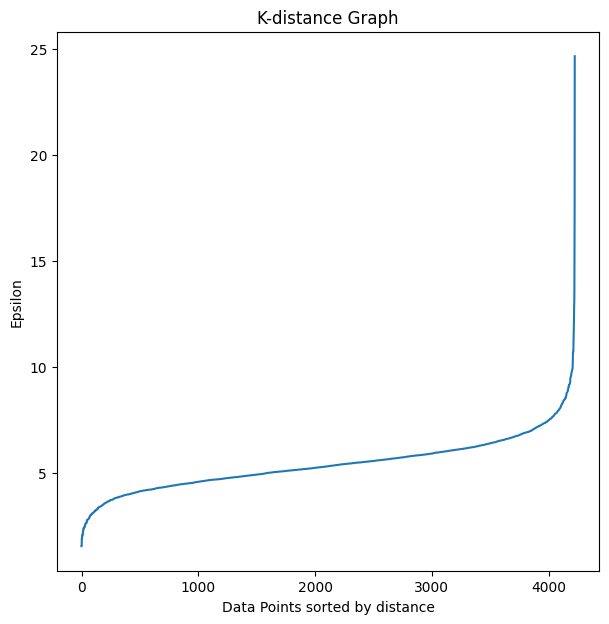

In [22]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=150)
nbrs = neigh.fit(scaledgenes)
distances, indices = nbrs.kneighbors(scaledgenes)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(7,7))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

Fig 7. The optimal value for DBScan's eps is seen in the K-Distance graph when the curvature is maximal. This happens around a value of eps=7, which is in agreement with what we see in the histogram.

## V-b Rub DBSCAN

initialize the dbscan _eps_ hyperparameter value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. How many clusters do you have, how many outliers? is that a significant number?

In [23]:
geneclustersDBS = skl.cluster.DBSCAN(eps=7)
geneclustersDBS.fit_predict(scaledgenes)

np.unique(geneclustersDBS.labels_)

array([-1,  0,  1])

## V-c plot the data in the t-SNE and UMAP projections color-coded by DBSCAN cluster

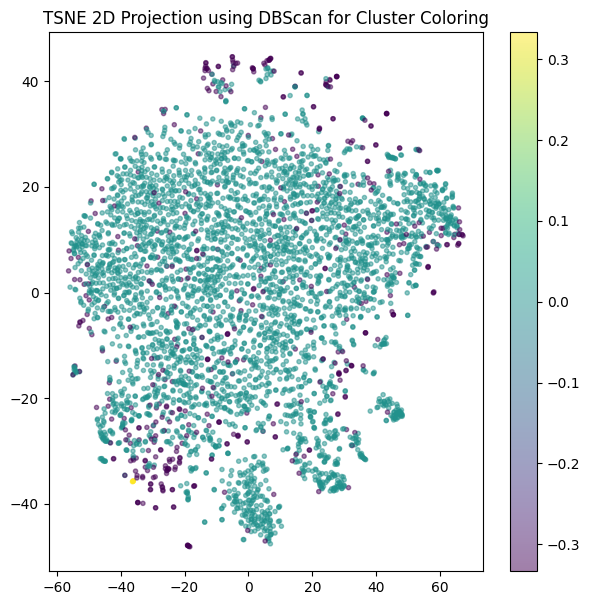

In [24]:
plt.figure(figsize=(7, 7))
plt.scatter(twodproj[:,0], twodproj[:,1], c=(geneclustersDBS.labels_ / np.unique(geneclustersDBS.labels_).size), marker='.', alpha = 0.5)
plt.title('TSNE 2D Projection using DBScan for Cluster Coloring')
plt.colorbar()

Fig 8. In this TSNE 2D projection of the gene dataset using DBScan to find clusters, we see that there are two distinct clusters, with a couple of outliers. This is close to the number of clusters found using KN clustering.

Text(0.5, 1.0, 'UMAP 2D Projection using DBScan for Cluster Coloring')

<Figure size 700x700 with 0 Axes>

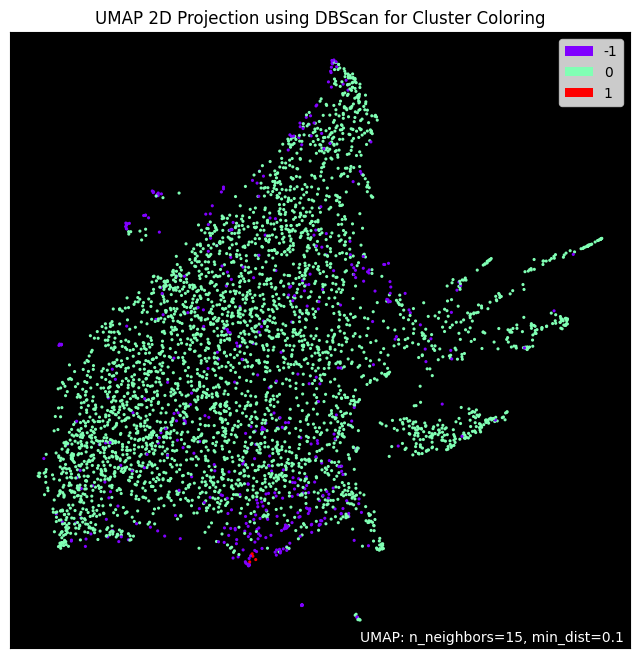

In [25]:
plt.figure(figsize=(7, 7))
ax = umap.plot.points(mapper, labels=geneclustersDBS.labels_, theme='fire')
ax.set_title('UMAP 2D Projection using DBScan for Cluster Coloring')

Fig 9. In this UMAP 2D projection of the gene dataset using DBScan to find clusters, we also see that there are two distinct clusters, with a couple of outliers. This is close to the number of clusters found using KN clustering.

# VI Agglomerative clustering


## VI-a run agglomerative clustering with standard distance choices: ward linkage and Euclidean distance

In [43]:
clusteringAg = skl.cluster.AgglomerativeClustering(affinity='euclidean', linkage='ward')
clusteringAg.fit_predict(scaledgenes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, ..., 0, 0, 0])

choose ward linkage and plot the dendrogram of the clusters

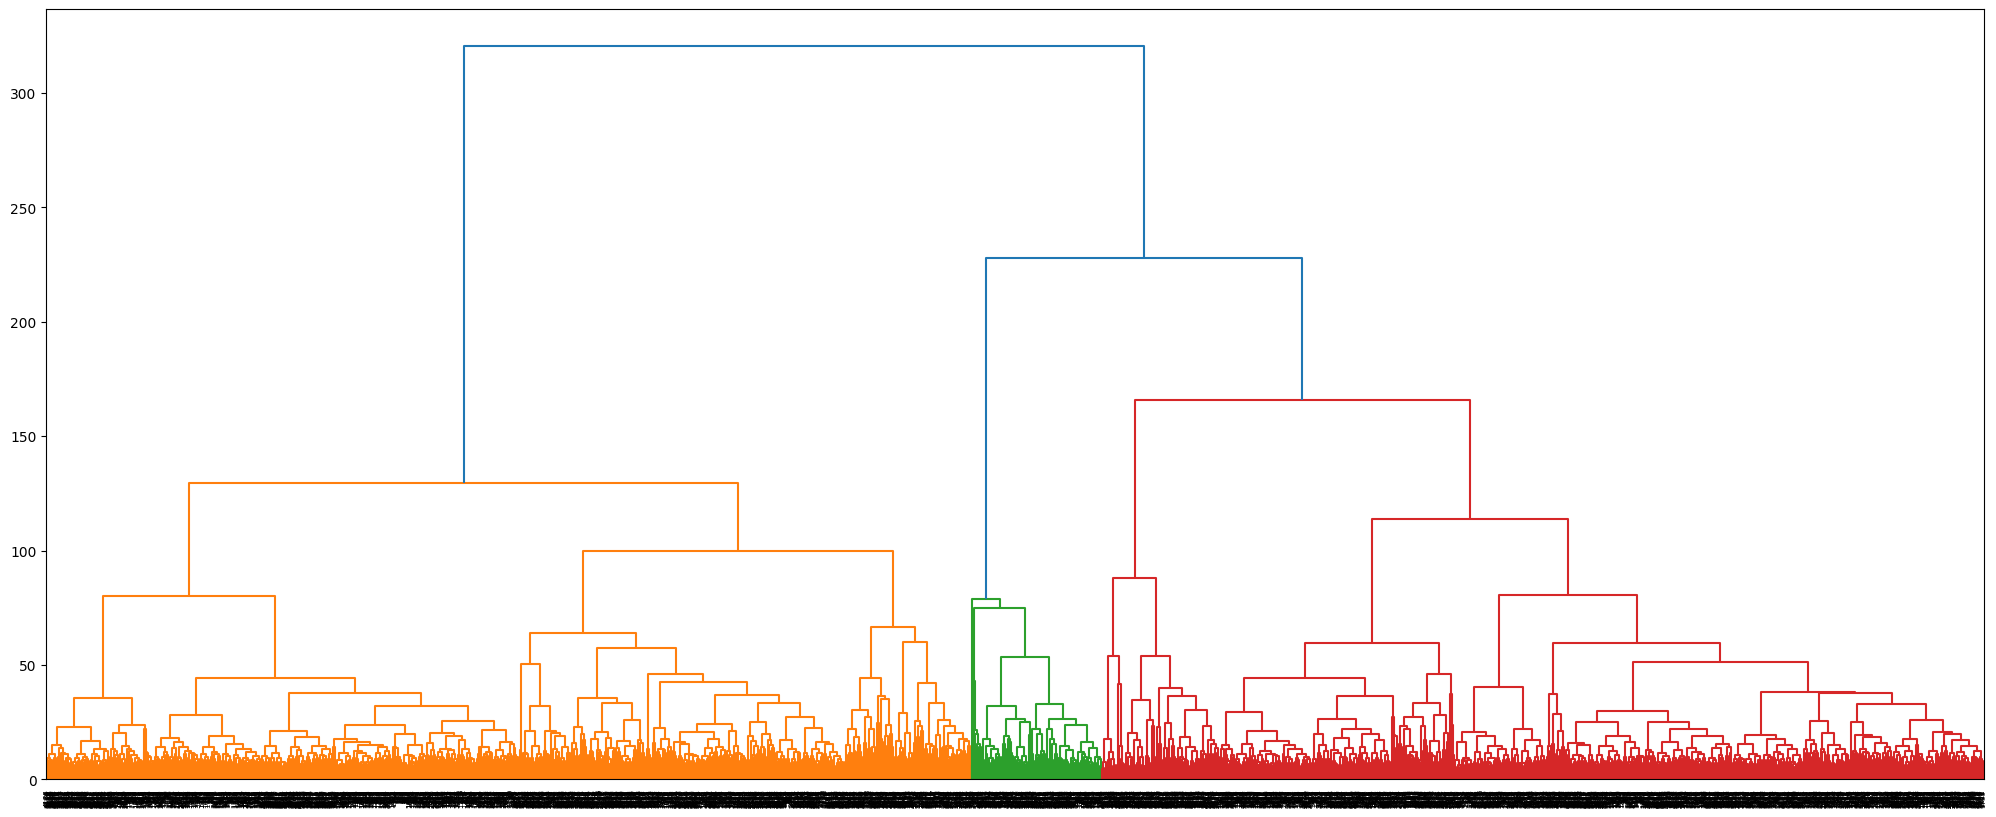

In [28]:
Z = linkage(scaledgenes, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Fig 10. Dendrogram for Euclidean affinity and ward linkage method of agglomerative clustering. This figure shows a clear representation of how each point was gradually joined into larger clusters based on the ward linkage method, eventually resulting in two clusters.

repeat with a different linkage and comment on differences

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


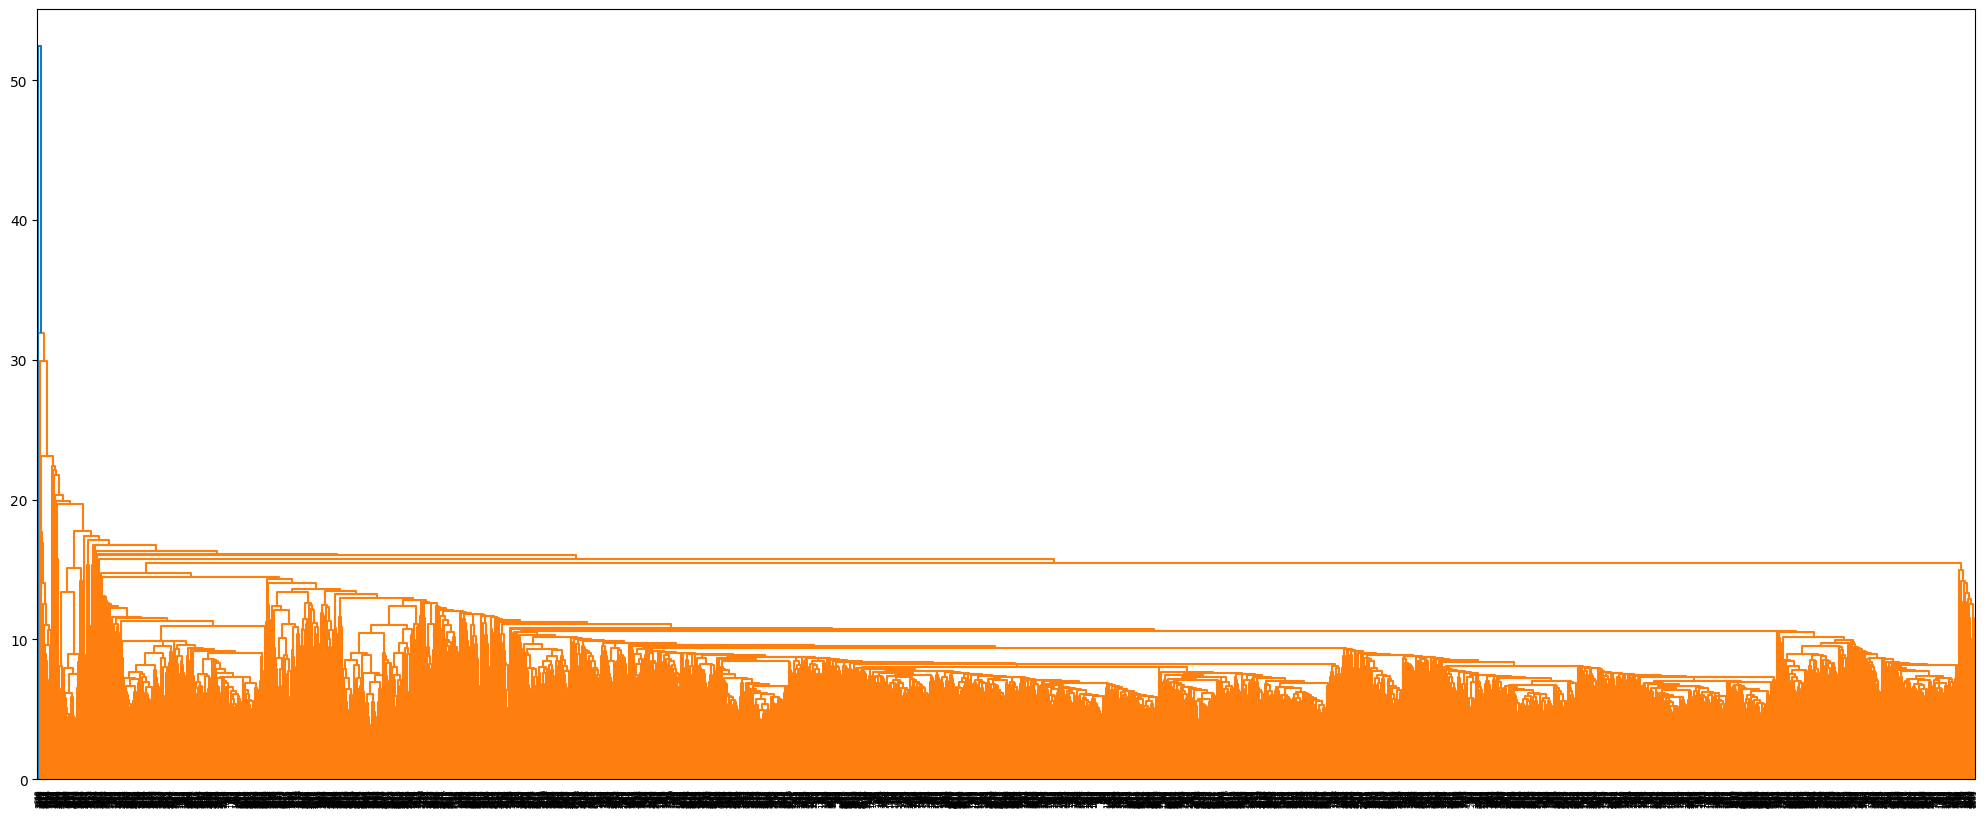

In [29]:
clusteringAg = skl.cluster.AgglomerativeClustering(affinity='euclidean', linkage='average')
clusteringAg.fit_predict(scaledgenes)
Z = linkage(scaledgenes, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Fig 11. Dendrogram for agglomerative clustering using Euclidean affinity and the average linkage method. The clustering here doesn't seem to be performing very well, since it is clustering most data points into a single cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


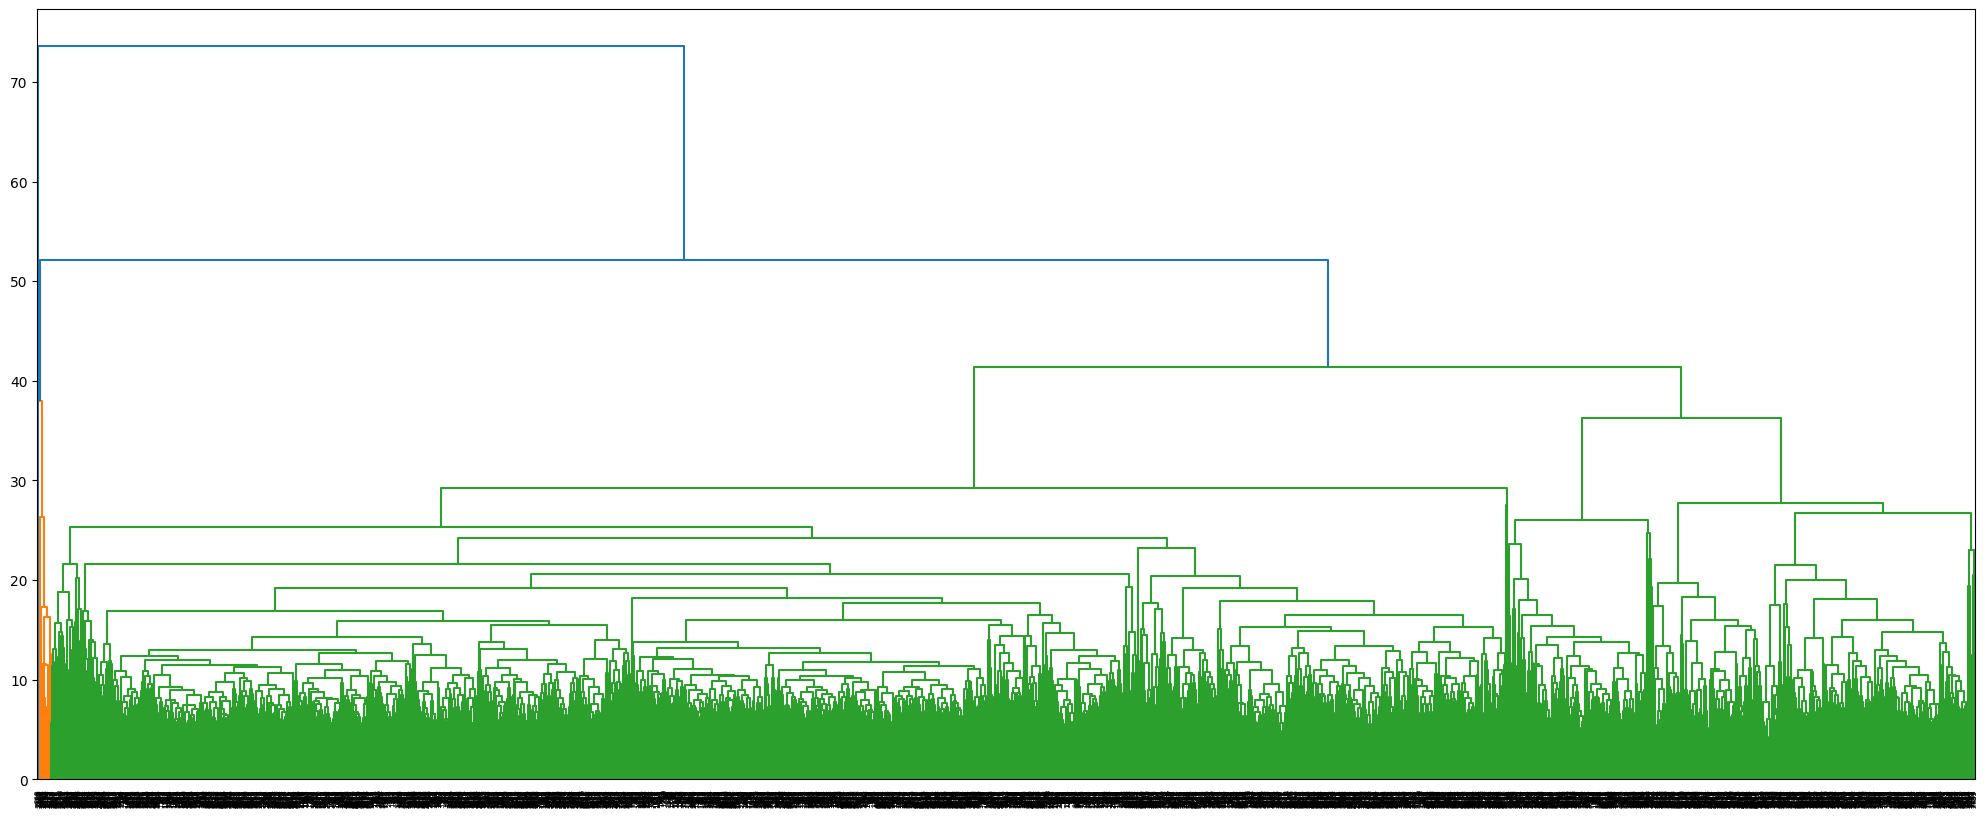

In [30]:
clusteringAg = skl.cluster.AgglomerativeClustering(affinity='euclidean', linkage='complete')
clusteringAg.fit_predict(scaledgenes)
Z = linkage(scaledgenes, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Fig 12. Dendrogram of agglomerative clustering using Euclidean affinity and complete linkage. Here we see that we arrive at two clusters in less steps (around 70) that those achieved with the ward linkage (around 300 steps).

# VI-b rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means.



In [31]:
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [32]:
geneclustersAg.fit_predict(scaledgenes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, ..., 0, 0, 0])

In [33]:
geneclustersAg.labels_

array([1, 1, 1, ..., 0, 0, 0])

## VI-c plot the 2D TSNE projection colorcoded as before

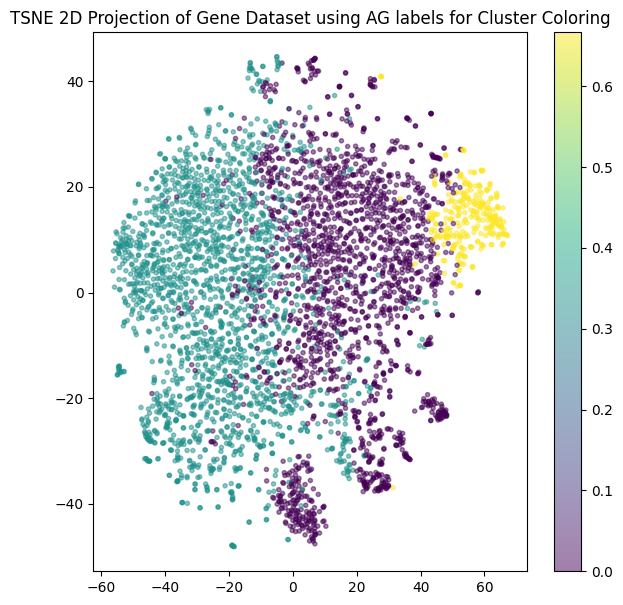

In [34]:
plt.figure(figsize=(7, 7))
plt.scatter(twodproj[:,0], twodproj[:,1], c=(geneclustersAg.labels_ / geneclustersAg.n_clusters), marker='.', alpha = 0.5)
plt.title('TSNE 2D Projection of Gene Dataset using AG labels for Cluster Coloring')
plt.colorbar()

Fig 13. TSNE 2D projection of gene dataset using agglomerative clustering labels. This clustering is very similar to the K-Means clustering, but very different to the DBScan clustering.

# VII Comment, in the spirit of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC187526, which was the most "useful" method for clustering

Here, I applied three clustering methods to the gene dataset. In general, both the K-Means clustering and Agglomerative clustering methods seem to be in agreement, predicting two to three distinct clusters. While DBScan also predicts 2 clusters, the 2D projection figure shows a marked difference with the other two clustering methods. Using DBScan is also very dependent, and changes drastically, on the choice of hyperparameter. I think the most useful method to use here is K-Means, because it seems to be consistent, and is less computationally expensive than the Agglomerative method.